In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [5]:
test = pd.read_csv("/kaggle/input/titanic/test.csv") 
train = pd.read_csv("/kaggle/input/titanic/train.csv")
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")


In [6]:
print(train.info)
print(train.tail)
print(train.columns)
train.describe()

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
import seaborn as sns

In [8]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

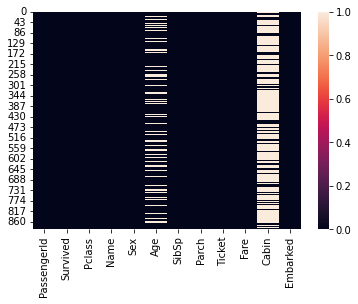

In [9]:
sns.heatmap(train.isnull())

<AxesSubplot:>

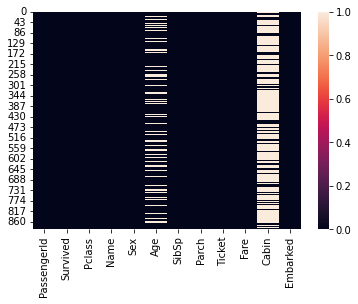

In [10]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

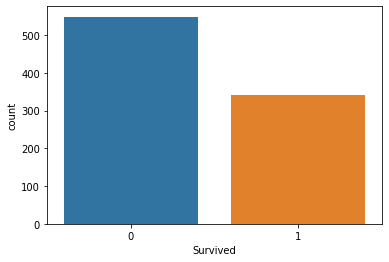

In [11]:
sns.countplot(x='Survived', data=train)

In [12]:
#생존자가 적음 
# 사망자가 500명 이상
# 생존자가 330~350명 사이

In [13]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

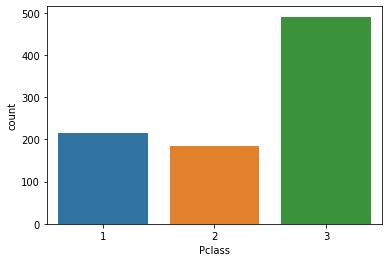

In [14]:
sns.countplot(x='Pclass',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

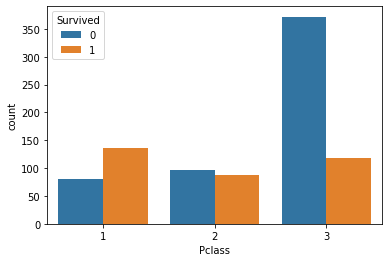

In [15]:
sns.countplot(x='Pclass', hue = 'Survived' ,data=train)

In [16]:
# 3등급의 많은 사람이 사망했다. 3등급 생존자대비 3배이상이다.
# 1등급의 승객은 생존자가 많았다.
# 왜 그럴까?


<AxesSubplot:xlabel='Sex', ylabel='count'>

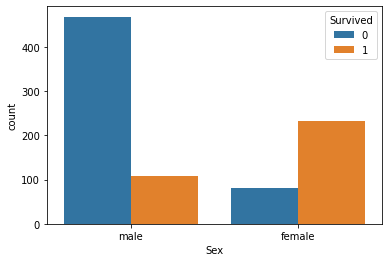

In [17]:
sns.countplot(x='Sex' ,hue = 'Survived' ,data=train)

In [18]:
#여성의 생존율이 남성보다 높았다.
#남성은 3/2 이상이 사망했다.
#여성의 절대적인 수 가 적다.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

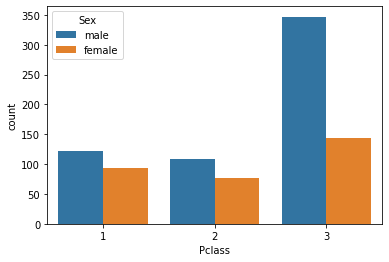

In [19]:
sns.countplot(x='Pclass', hue = 'Sex' ,data=train) #등급이 생존율에 영향을 준것을 아닐까

In [20]:
# 1등급은 여성이 많기 때문에 생존자가 많은것은 아니다.

<AxesSubplot:xlabel='Age', ylabel='Count'>

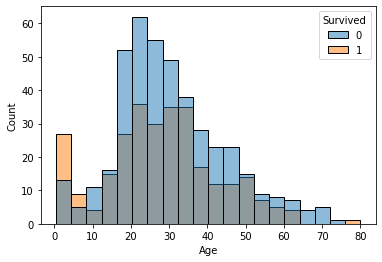

In [21]:
#두번째 가설 - 나이가 영향을 끼치진 않았을까
sns.histplot(x = 'Age', hue='Survived', data= train)


<AxesSubplot:xlabel='Age', ylabel='Count'>

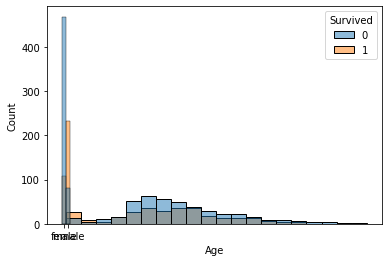

In [22]:
sns.histplot(x = 'Age', hue='Survived', data = train)
sns.histplot(x = 'Sex', hue='Survived', data = train)

In [24]:
# sns.countplot : x축 존재. y(데이터 개수) - 막대그래프
# sns.boxplot : 박스 플롯. 최대값, 최소값, 중앙값, 이상치, 25%, 75%
# sns.lmplot(x='', y='', data=__)
# sns.lmplot(x='', y='', hue='',  ,data=__)
# sns.pairplot() :그래프 여러개(하나의 변수와 다른 변수의 상관관계보기)
# sns.heatmap()
# sns.histplot()   : 히스토그램(수치형 컬럼에 대한 분포 등을 확인)
# sns.barplot()    : 막대그래프 - x는 범주형, y는 그 값의 평균

In [43]:
frain_age_none = train[train['Age'].isnull()]
frain_age_none

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


<AxesSubplot:xlabel='Age', ylabel='count'>

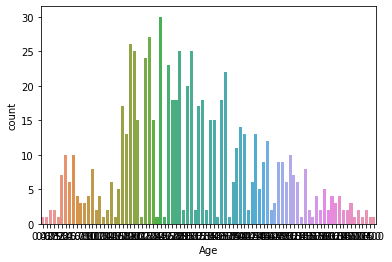

In [36]:
sns.countplot (x='Age', data = train)

In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

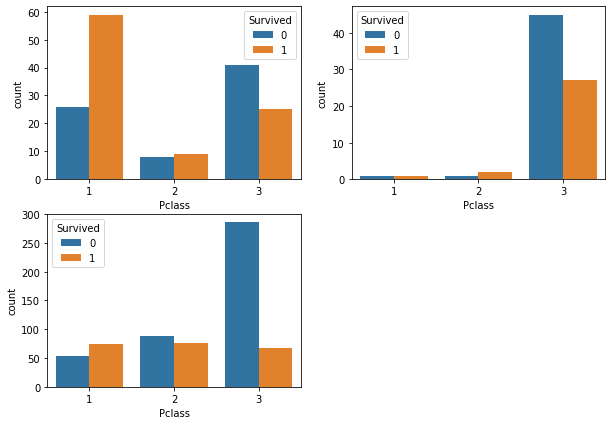

In [45]:
import matplotlib.pyplot as plt

train_C = train[train['Embarked']=='C']   # 데이터에서 Embarked:C만 가져오기
train_Q = train[train['Embarked']=='Q']   # 데이터에서 Embarked:Q만 가져오기
train_S = train[train['Embarked']=='S']   # 데이터에서 Embarked:S만 가져오기

plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(x='Pclass', hue='Survived', data=train_C)

plt.subplot(2,2,2)
sns.countplot(x='Pclass', hue='Survived', data=train_Q)

plt.subplot(2,2,3)
sns.countplot(x='Pclass', hue='Survived', data=train_S)